# Simulating the SSH model

Here we simulate the SSH model using the MyQLM backend.

For the background on the SSH model see the [previous notebook](https://ichec.github.io/qse/tutorials/ssh_model.html).

In [5]:
import qse
import numpy as np
import matplotlib.pyplot as plt

In [2]:
angle = np.arccos(np.sqrt(1.0 / 3.0)) * 180 / np.pi
print(f"Angle is: {angle:.2f} degrees")

Angle is: 54.74 degrees


We create two chains of qubits, A and B.
By rotating them by the angle above, there will be no interactions between qubits on the same chain.

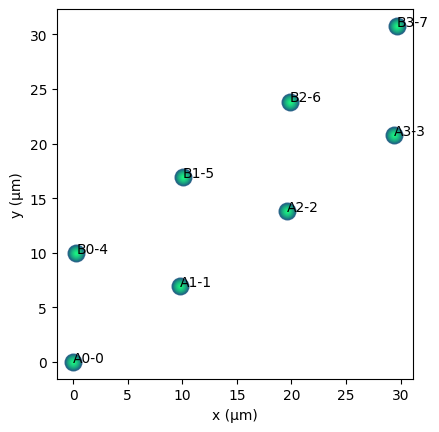

In [3]:
lattice_spacing = 12
repeats = 4

qbits1 = qse.lattices.chain(lattice_spacing=lattice_spacing, repeats=repeats)
qbits1.labels = [f"A{i}-{i}" for i in range(repeats)]

qbits2 = qse.lattices.chain(lattice_spacing=lattice_spacing, repeats=repeats)
qbits2.labels = [f"B{i}-{i+repeats}" for i in range(repeats)]
qbits2.translate((lattice_spacing * 0.5, 8, 0))

qbits_ssh = qbits1 + qbits2
qbits_ssh.rotate(
    90 - angle
)  # by rotating to this angle interactions in the A & B chains will cancel.

qbits_ssh.draw(show_labels=True, units="µm")

We can verify that there are no interactions in the same chain by computing the couplings between qubits.

In [4]:
magnetic_field = np.array([0.0, 1.0, 0.0])

pcalc_ssh = qse.calc.Myqlm(
    qbits=qbits_ssh,
    # amplitude=simple_pulse.amplitude,
    # detuning=simple_pulse.detuning,
    channel="mw_global",
    magnetic_field=magnetic_field,
)
pcalc_ssh.build_sequence()
pcalc_ssh.calculate()

TypeError: 'NoneType' object is not callable

## Version

In [ ]:
qse.utils.print_environment()